In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, preprocessing, decomposition

In [2]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.get("target")
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
features = iris.feature_names
X = df[features].values
y = df["target"].values


In [4]:
X = preprocessing.StandardScaler().fit_transform(X)
normalized_X = pd.DataFrame(X, columns=features)
normalized_X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [5]:
pca = decomposition.PCA(n_components=2)
main_components = pca.fit_transform(normalized_X)
main_components

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

In [6]:
df_pca = pd.DataFrame(main_components, columns=["PC1", "PC2"])
target = pd.Series(iris.target, name="target")
result_df = pd.concat([df_pca, target], axis=1)
result_df.head()

,PC1,PC2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


In [7]:
print("Variance of each component:", pca.explained_variance_ratio_)
print("\nTotal variance explained:", round(sum(list(pca.explained_variance_ratio_)) * 100, 2), "%")

Variance of each component: [0.72962445 0.22850762]

Total variance explained: 95.81 %


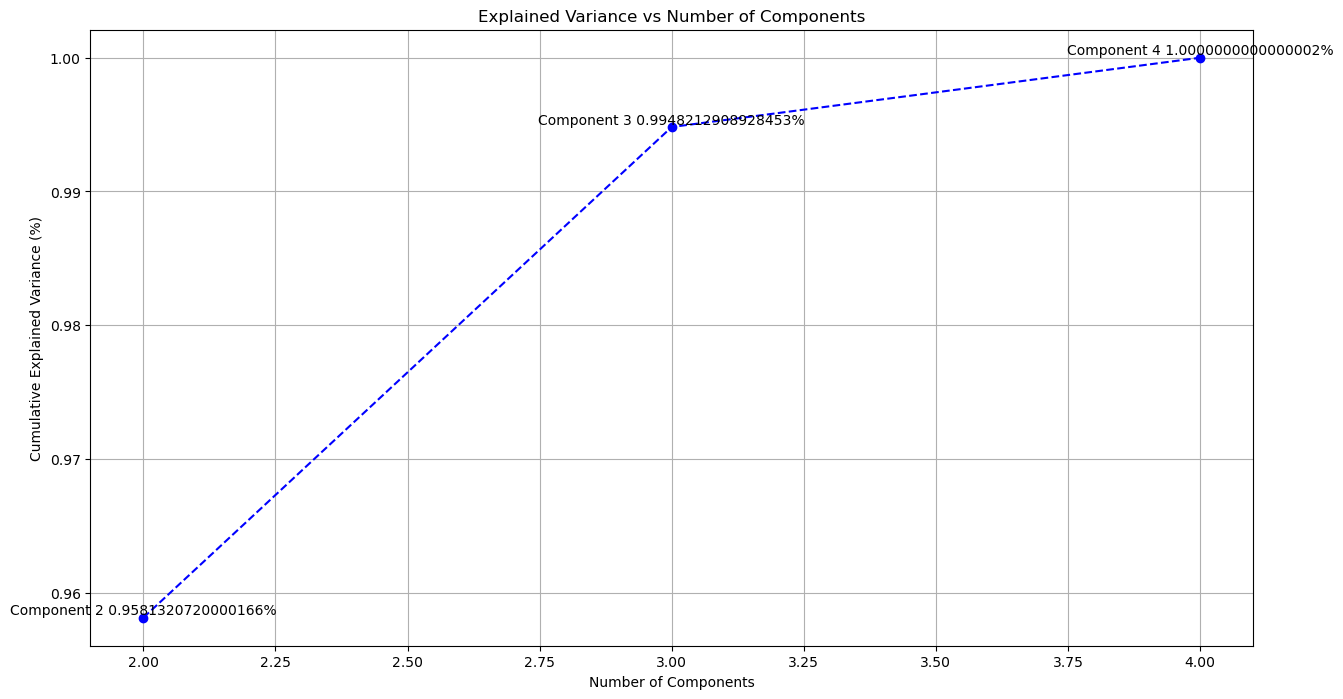

In [8]:
results = []

X = normalized_X

for n in range(2, 5):
    pca = decomposition.PCA(n_components=n)
    pca.fit(X)
    explained_variance = np.sum(pca.explained_variance_ratio_)
    results.append(explained_variance)

plt.figure(figsize=(15, 8))
plt.plot(range(2, 5), results, color="b", marker="o", linestyle="dashed")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance (%)")
plt.title("Explained Variance vs Number of Components")
plt.grid(True)

for i, (n_components, explained_var) in enumerate(zip(range(2, 5), results)):
    plt.text(n_components, explained_var, f"Component {n_components} {explained_var}%", ha="center", va="bottom")

plt.show()

